# Regresión logística binaria

Regresión logística binaria es una Bernoulli condicional para clasificación binaria,
$$p(y\mid\boldsymbol{x}, \boldsymbol{\theta})%
=\operatorname{Ber}(y\mid\sigma(f(\boldsymbol{x};\boldsymbol{\theta}))),$$
de log-odds lineal con la entrada,
$$f(\boldsymbol{x};\boldsymbol{\theta})=\boldsymbol{w}^t\boldsymbol{x}+b,$$
por lo que
$$\begin{align*}
p(y=1\mid\boldsymbol{x};\boldsymbol{\theta})%
&=\sigma(\boldsymbol{w}^t\boldsymbol{x}+b)%
=\frac{1}{1+\exp(-(\boldsymbol{w}^t\boldsymbol{x}+b))}\\
p(y=0\mid\boldsymbol{x};\boldsymbol{\theta})%
&=\sigma(-(\boldsymbol{w}^t\boldsymbol{x}+b))%
=\frac{1}{1+\exp(\boldsymbol{w}^t\boldsymbol{x}+b)}%
\end{align*}$$
La frontera entre clases se obtiene con log-odds nula.

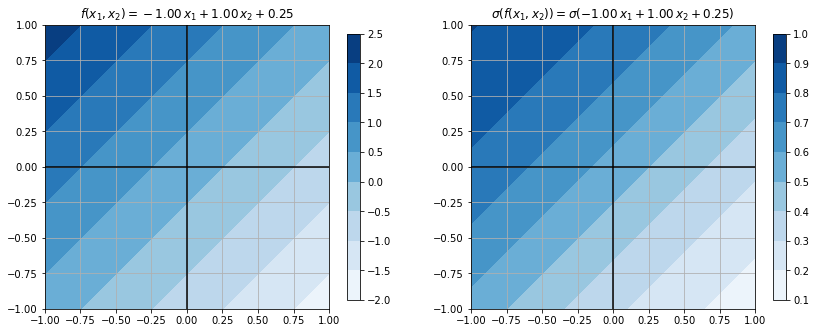

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(a):
	return 1 / (1 + np.exp(-a))
x_min = y_min = -1.0
x_max = y_max = 1.0
x, y = np.meshgrid(np.linspace(x_min, x_max, num=10), np.linspace(y_min, y_max, num=10))
w1 = -1.0
w2 = 1.0
b = 0.25
f = w1 * x + w2 * y + b
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
for i in (0, 1):
    axes[i].set(aspect='equal', xlim=(x_min, x_max), ylim=(y_min, y_max))
    axes[i].grid()
    axes[i].axhline(0, color='black')
    axes[i].axvline(0, color='black')
    if not i:
        axes[i].set_title('$f(x_1, x_2)={:.2f}\,x_1+{:.2f}\,x_2+{:.2f}$'.format(w1, w2, b))
        cp = axes[i].contourf(x, y, f, cmap='Blues')
    else:
        axes[i].set_title('$\sigma(f(x_1, x_2))=\sigma({:.2f}\,x_1+{:.2f}\,x_2+{:.2f})$'.format(w1, w2, b))
        cp = axes[i].contourf(x, y, sigmoid(f), cmap='Blues')
    plt.colorbar(cp, ax=axes[i], shrink=0.7)